Import libraries

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import math

Read and load file

In [248]:
# --- 2. Load dataset ---
df = pd.read_csv("diabetes_dirty.csv")
print(df.head())

#Get stats
print(df.describe())

#check info
print(df.info())

# Check for missing info
missing_values_count = df.isnull().sum()
print(missing_values_count)

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6  PROGRESSION
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87          151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69           75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85          141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89          206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80          135
              AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.00000

Encode sex column

In [249]:
df['SEX'] = pd.Categorical(df['SEX'])
df = pd.get_dummies(df, columns=['SEX'], drop_first=True)
print(df.head())

# Convert any boolean columns to integers (0/1)
for col in df.select_dtypes('bool').columns:
    df[col] = df[col].astype(int)

print(df.head())

   AGE   BMI     BP   S1     S2    S3   S4      S5  S6  PROGRESSION  SEX_2
0   59  32.1  101.0  157   93.2  38.0  4.0  4.8598  87          151   True
1   48  21.6   87.0  183  103.2  70.0  3.0  3.8918  69           75  False
2   72  30.5   93.0  156   93.6  41.0  4.0  4.6728  85          141   True
3   24  25.3   84.0  198  131.4  40.0  5.0  4.8903  89          206  False
4   50  23.0  101.0  192  125.4  52.0  4.0  4.2905  80          135  False
   AGE   BMI     BP   S1     S2    S3   S4      S5  S6  PROGRESSION  SEX_2
0   59  32.1  101.0  157   93.2  38.0  4.0  4.8598  87          151      1
1   48  21.6   87.0  183  103.2  70.0  3.0  3.8918  69           75      0
2   72  30.5   93.0  156   93.6  41.0  4.0  4.6728  85          141      1
3   24  25.3   84.0  198  131.4  40.0  5.0  4.8903  89          206      0
4   50  23.0  101.0  192  125.4  52.0  4.0  4.2905  80          135      0


This is an optional step not listed in the task. Correlation matrix.
Results from the correlation matrix indicates that a strong positive correlation between BMI (0.58) and S5 (0.56)

PROGRESSION    1.000000
BMI            0.586450
S5             0.565883
BP             0.441482
S4             0.430453
S6             0.382483
S1             0.212022
AGE            0.187889
S2             0.174054
SEX_2          0.043062
S3            -0.394789
Name: PROGRESSION, dtype: float64


<Axes: >

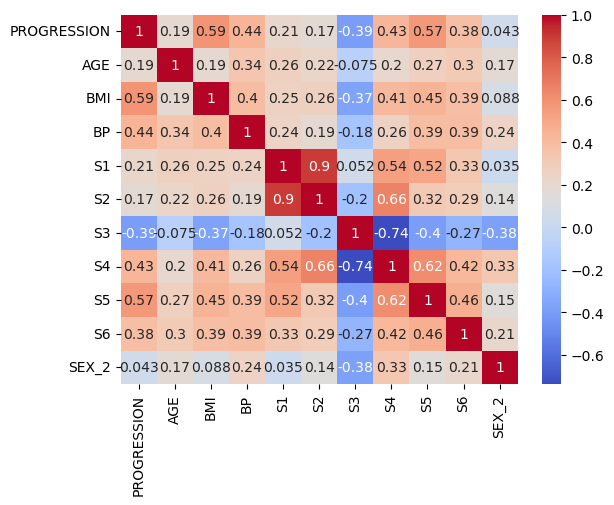

In [250]:
corr = df[['PROGRESSION', 'AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'SEX_2']].corr()
print(corr['PROGRESSION'].sort_values(ascending=False))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Declare dependent and independent variables

In [251]:
X = df.drop(columns = 'PROGRESSION')
y = df['PROGRESSION']

#print(X)
#print(y)

Generate training set

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state =42)

To determine if the data should be normalized or standardized, will plot histograms of the data. If it is bell shapped, will standardize the data.
Used StandardScaler to transform data since most data is mostly bell shaped.
In addition after reviewing the descriptive stats:
S1 has a minimum of 91 and a max of 300, whereas S5 has a minimum of 3, which means that S1 will dominate. For models that are depenedent on magninutes or distances like linear regression models, scaling is required.

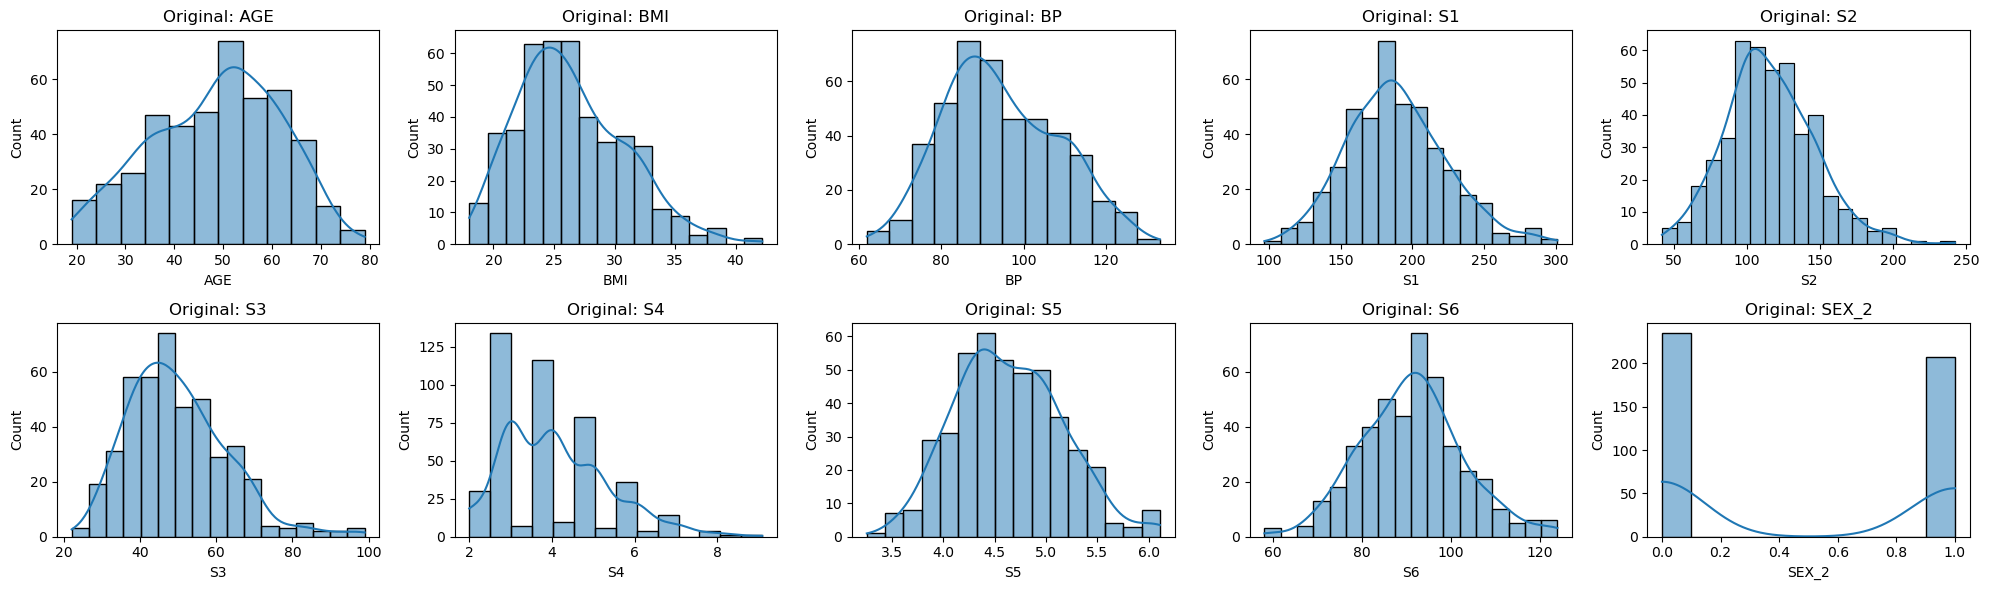

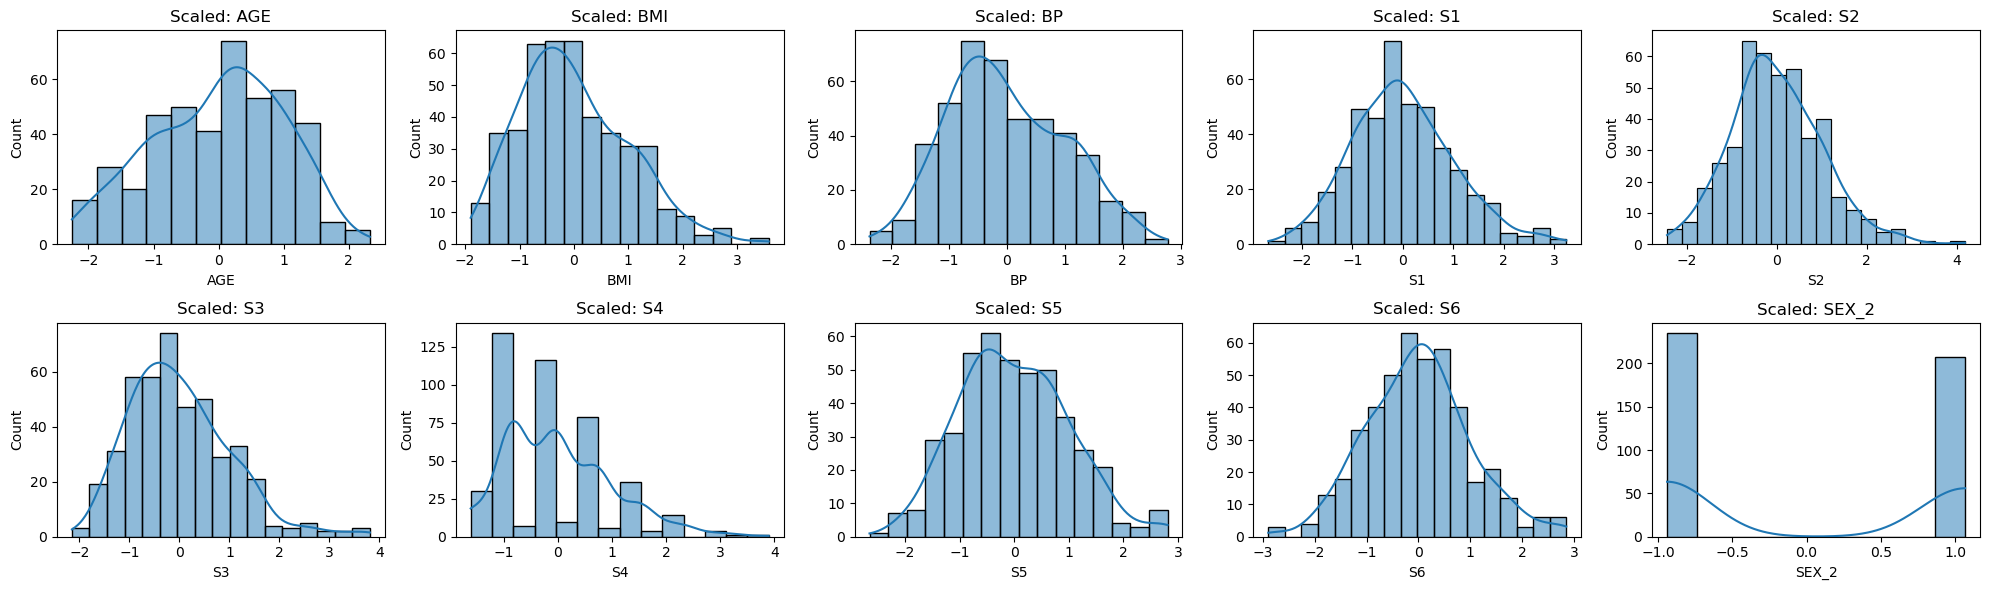

In [253]:

numeric_cols = ["AGE", "BMI", "BP", "S1", "S2", "S3", "S4", "S5", "S6", "SEX_2"]
data = df[numeric_cols]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

# Function to plot histograms dynamically
def plot_histograms(df_plot, title_prefix):
    n_cols = 5
    n_rows = math.ceil(len(df_plot.columns) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
    axes = axes.flatten()
    
    for i, col in enumerate(df_plot.columns):
        sns.histplot(df_plot[col], kde=True, ax=axes[i])
        axes[i].set_title(f"{title_prefix}: {col}")
    
    # Turn off any unused axes
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot original
plot_histograms(data, "Original")

# Plot scaled
plot_histograms(scaled_df, "Scaled")

Generate a multiple linear regression model using the training set. Use all of the independent variables.

In [254]:
X = scaled_df
y = df['PROGRESSION']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state =42)

multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


7. Print out the intercept and coeffi cients of the trained model.

In [255]:
# Intercept
print("Intercept:", multiple_model.intercept_)

# Coefficients
print("Coefficients:", multiple_model.coef_)

# Optional: print each feature with its coefficient
for feature, coef in zip(X_train.columns, multiple_model.coef_):
    print(f"{feature}: {coef}")

Intercept: 151.34560453985986
Coefficients: [  1.80291044  25.80070495  16.53858529 -44.30640613  24.64170961
   7.77309591  13.09553713  35.01740872   2.31502709 -11.50907105]
AGE: 1.802910438962721
BMI: 25.800704946064023
BP: 16.53858528808869
S1: -44.30640613327395
S2: 24.64170961122039
S3: 7.773095908451925
S4: 13.09553712533645
S5: 35.01740872328466
S6: 2.315027092899585
SEX_2: -11.509071046619425


8. Generate predictions for the test set.

In [256]:
# Generate predictions
y_pred = multiple_model.predict(X_test)

# Print predictions
print(y_pred)

[139.5475584  179.51720835 134.03875572 291.41702925 123.78965872
  92.1723465  258.23238899 181.33732057  90.22411311 108.63375858
  94.13865744 168.43486358  53.5047888  206.63081659 100.12925869
 130.66657085 219.53071499 250.7803234  196.3688346  218.57511815
 207.35050182  88.48340941  70.43285917 188.95914235 154.8868162
 159.36170122 188.31263363 180.39094033  47.99046561 108.97453871
 174.77897633  86.36406656 132.95761215 184.53819483 173.83220911
 190.35858492 124.4156176  119.65110656 147.95168682  59.05405241
  71.62331856 107.68284704 165.45365458 155.00975931 171.04799096
  61.45761356  71.66672581 114.96732206  51.57975523 167.57599528
 152.52291955  62.95568515 103.49741722 109.20751489 175.64118426
 154.60296242  94.41704366 210.74209145 120.2566205   77.61585399
 187.93203995 206.49337474 140.63167076 105.59678023 130.70432536
 202.18534537 171.13039501 164.91423047 124.72472569 144.81030894
 181.99635452 199.41369642 234.21436188 145.95665512  79.86703276
 157.369412

9. Compute R squared for your model on the test set. You can use r2_score from sklearn.metrics to obtain this score.

In [257]:
# Generate predictions for the test set
y_pred = multiple_model.predict(X_test)

# Compute R squared (R²) score
r2 = r2_score(y_test, y_pred)

# Print R²
print("R squared (R²) on the test set:", r2)

# Notes:
# - R² indicates the proportion of variance in the dependent variable
#   that is predictable from the independent variables.
# - R² = 1 → perfect prediction; R² = 0 → model predicts no better than the mean
# - Negative R² → model performs worse than simply predicting the mean


R squared (R²) on the test set: 0.4526027629719195


The R² explains ~ 48% of the variance in the progression of the disease. The model does not account for 52% of the variance. 
There might be other important features that were not included in the data or this multiple linear regression model is not the best fit.

The coefficients that were printed out before. 
AGE	0.0234	Slight positive effect on target; as age increases, predicted progression increases slightly.
BMI	0.3311	Positive effect; higher BMI =higher predicted progression.
BP	0.214	Positive effect; higher blood pressure = higher predicted progression.
S1	-0.575 Negative effect; higher S1 values decrease predicted progression.
S2	0.319	Positive effect.
S3	0.100	Small positive effect.
S4	0.170	Slight positive effect.
S5	0.454	Strong positive effect; higher S5 strongly increases predicted progression.
S6	0.03	Very small positive effect.
SEX_2	-0.149	Being in the SEX_2 category (male/female depending on encoding) slightly reduces predicted progression.
